<p style="text-align:center;font-size:24px;color:blue;">
R5.A.12 & R5.B.10 : Modélisation Mathématique
<br> <em>Antoine Nongaillard</em> <br>
semaine 2 : <code>pandas</code> — 23 septembre 2024
</p>

# Objectifs :

* librairie `pandas` : manipulation et agrégation — visualisation des données
* nettoyage de données

#  Exercice 1 : Premier contact avec la librairie pandas

> En préambule, nous rappelons que l’**aide sur une fonction/méthode** donnée peut s’obtenir rapidement au sein d’une cellule de code.
> 
> Par exemple, il suffit de saisir `pandas.read_csv?` pour obtenir directement l’aide sur la fonction `read_csv(...)`.

## E1Q1. Indexation par défaut

Intéressons-nous d’abord à la question de l’indexation et de l’accès aux données par défaut.

* Importez la colonne `age` du fichier `data_mm02_clients_series.csv` grâce à l’option `usecols` de la méthode `read_csv(...)`.
* Affichez les 5 premières lignes, via la méthode `head()`.
* Affichez les 5 dernières lignes, via la méthode `tail()`.
* Affichez la taille des données, via l’attribut `shape`.
* Affichez les données d’indice 2 et d’étiquette 2 via les méthodes `iloc` et `loc`. Quelle différence cela fait-il ? Pourquoi ?


In [16]:
import pandas as pd

# Import the 'age' column from the CSV file
df_age = pd.read_csv('data_mm02_clients_series.csv', usecols=['age'])

# Display the first 5 rows
print(df_age.head())

# Display the last 5 rows
print(df_age.tail())

# Display the shape of the data
print(df_age.shape)

# Display the data at index 2 using iloc and loc
print(df_age.iloc[2])
print(df_age.loc[2])

    age
0  54.0
1  23.0
2  30.0
3  42.0
4  47.0
     age
45  34.0
46  37.0
47  35.0
48  49.0
49  54.0
(50, 1)
age    30.0
Name: 2, dtype: float64
age    30.0
Name: 2, dtype: float64


## E1Q2. Indexons différemment les données.

* Importez les colonnes `age` et `nom` du fichier `data_mm02_clients_series.csv` en utilisant cette fois le nom
comme index, grâce à l’option `index_col` de la fonction `read_csv(...)`.
* Affichez Les 5 premières lignes et constatez la différence avec l’indexation par défaut. 
* Affichez également la taille des données. Qu’est-ce qui change ?
* Affichez l’âge d’indice 2 et l’âge de `Beaufort Lesage` via les méthodes `iloc` et `loc`.

In [17]:
# Import the 'age' and 'nom' columns from the CSV file with 'nom' as the index
df_age_nom = pd.read_csv('data_mm02_clients_series.csv', usecols=['age', 'nom'], index_col='nom')

# Display the first 5 rows
print(df_age_nom.head())

# Display the shape of the data
print(df_age_nom.shape)

# Display the age at index 2 using iloc and the age of 'Beaufort Lesage' using loc
print(df_age_nom.iloc[2])
print(df_age_nom.loc['Beaufort Lesage'])

                   age
nom                   
Laurent Dagenais  54.0
Guy Marois        23.0
Beaufort Lesage   30.0
Russell Durand    42.0
Alexis Riel       47.0
(50, 1)
age    30.0
Name: Beaufort Lesage, dtype: float64
age    30.0
Name: Beaufort Lesage, dtype: float64


## E1Q3. Filtrons notre dataframe

Pratiquons maintenant quelques restrictions afin de filtrer notre dataframe !

* Affichez les informations des personnes ayant exactement 41 ans (en combinant l’indexation booléenne et la
méthode `.loc(...)`).
* Affichez uniquement le nom (autrement dit l’index) de la dernière personne sur cette liste.
* Affichez uniquement les informations des personnes ayant entre 40 et 50 ans.
* Exportez la liste de toutes les quadragénaires dans un fichier CSV nommé `result_mm02_quadra.csv` dans lequel le séparateur est ’|’ (option `sep`) en utilisant la méthode `to_csv(...)`.

In [18]:
# Filter for people exactly 41 years old
df_41_years_old = df_age_nom[df_age_nom['age'] == 41]
print(df_41_years_old)

# Display the name (index) of the last person in this list
print(df_41_years_old.index[-1])

# Filter for people between 40 and 50 years old
df_40_to_50_years_old = df_age_nom[(df_age_nom['age'] >= 40) & (df_age_nom['age'] <= 50)]
print(df_40_to_50_years_old)

# Export the list of all people in their forties to a CSV file
df_40_to_50_years_old.to_csv('result_mm02_quadra.csv', sep='|')

                 age
nom                 
Leon Lapresse   41.0
Aceline Hughes  41.0
Franck Dumont   41.0
Franck Dumont
                     age
nom                     
Russell Durand      42.0
Alexis Riel         47.0
Leon Lapresse       41.0
Normand Arsenault   44.0
Aceline Hughes      41.0
Prunella Josseaume  40.0
Yseult Charest      43.0
Dorothee Aupry      47.0
Franck Dumont       41.0
Arber Garcia        40.0
Arnaud Dubois       50.0
Pryor Beauchamp     45.0
Daisi Boileau       43.0
Somer Paquette      42.0
Morgana Bellemare   44.0
Merci Morin         50.0
Sumner Rocheleau    49.0


## E1Q4. Associons plusieurs fichiers

Voyons maintenant comment associer plusieurs fichiers.

* Importez dans un dataframe `clients1` les données du fichier CSV  `data_mm02_clients_part1.csv`.

In [19]:
# Import the data from the CSV file into a dataframe
clients1 = pd.read_csv('data_mm02_clients_part1.csv')

# Display the first 5 rows of the dataframe
print(clients1.head())

   identifiant                      email               nom genre
0            0  LaurentDagenais@rhyta.com  Laurent Dagenais     M
1            1      GuyMarois@fleckens.hu        Guy Marois     M
2            2  BeaufortLesage@einrot.com   Beaufort Lesage     M
3            3  RussellDurand@armyspy.com    Russell Durand     M
4            4       AlexisRiel@rhyta.com       Alexis Riel     M


> *Malheureusement, les données initiales ont été morcelées en deux fichiers, sous des formats différents en plus !*

* Importez dans un autre dataframe `clients2` les données du fichier JSON `data_mm02_clients_part2.json`, via la fonction `read_json(...)`.

In [20]:
# Import the data from the JSON file into a dataframe
clients2 = pd.read_json('data_mm02_clients_part2.json')

# Display the first 5 rows of the dataframe
print(clients2.head())

     identifiant                          email                 nom genre
150          150         RochMireault@gustr.com       Roch Mireault     M
151          151       NathalieCormier@cuvox.de    Nathalie Cormier     F
152          152      VallisMainville@gustr.com    Vallis Mainville     M
153          153  DanielleNeufville@teleworm.us  Danielle Neufville     F
154          154      AllyrianeRacine@gustr.com    Allyriane Racine     F


* Fusionnez les deux dataframes afin de n’en obtenir qu’un seul, contenant toutes les données. Pour les mettre bout à bout, la fonction `concat(...)` est nécessaire.

In [21]:
# Merge the two dataframes
clients_combined = pd.concat([clients1, clients2], ignore_index=True)

# Display the first 5 rows of the combined dataframe
print(clients_combined.head())

# Display the shape of the combined dataframe
print(clients_combined.shape)

   identifiant                      email               nom genre
0            0  LaurentDagenais@rhyta.com  Laurent Dagenais     M
1            1      GuyMarois@fleckens.hu        Guy Marois     M
2            2  BeaufortLesage@einrot.com   Beaufort Lesage     M
3            3  RussellDurand@armyspy.com    Russell Durand     M
4            4       AlexisRiel@rhyta.com       Alexis Riel     M
(228, 4)


* Récupérez et importez le fichier complémentaire contenant les identifiants et les ages de certains clients : le fichier 
`data_mm02_clients_age.csv`.
* Par **jointure** entre vos deux dataframes, reconstituez un ensemble de données complets (via la fonction `merge(...)` et les options `on` et `how`), sans perdre de clients au passage : on souhaite conserver les clients pour lesquels nous n’avons pas l’âge mais oublier les âges pour lesquels aucun client ne correspond. 
> *Vérifiez le nombre de lignes obtenues.*

In [22]:
# Import the complementary file containing client IDs and ages
clients_age = pd.read_csv('data_mm02_clients_age.csv')

# Merge the combined clients dataframe with the clients_age dataframe
clients_complete = pd.merge(clients_combined, clients_age, on='identifiant', how='left')

# Display the first 5 rows of the complete dataframe
print(clients_complete.head())

# Display the shape of the complete dataframe
print(clients_complete.shape)

   identifiant                      email               nom genre   age
0            0  LaurentDagenais@rhyta.com  Laurent Dagenais     M  54.0
1            1      GuyMarois@fleckens.hu        Guy Marois     M  23.0
2            2  BeaufortLesage@einrot.com   Beaufort Lesage     M  30.0
3            3  RussellDurand@armyspy.com    Russell Durand     M  42.0
4            4       AlexisRiel@rhyta.com       Alexis Riel     M  47.0
(228, 5)


## E1Q5. Encore quelques restrictions


* Affichez les informations liées aux clients dont l’âge reste inconnu, via la méthode `isnull()`. 
* Affichez tous les clients ayant un numéro supérieur à 222.

> Dès qu’on souhaite analyser ou effectuer un traitement sur une colonne de type ’chaîne de caractères’, il faut appliquer la méthode `….str.<la-méthode>()`.
* De cette manière, affichez tous les clients ayant un nom commençant par la lettre `B` via la méthode `startswith(...)`.

  
* Ajoutez une colonne `longueur_nom` à votre dataframe contenant le nombre de caractères du champ `nom`, via la méthode `len()`.

> Le fait de trouver à la fois le nom et le prénom à l’intérieur du même champ ne nous arrange pas.

* Faites les modifications nécessaires afin d’obtenir une colonne `nom` et une colonne `prénom` dédiées.

> La méthode `split(...)` avec son option booléenne `expand` mérite votre attention.

In [23]:
# Display information related to clients whose age is unknown
clients_age_unknown = clients_complete[clients_complete['age'].isnull()]
print(clients_age_unknown)

# Display all clients with an identifier greater than 222
clients_id_above_222 = clients_complete[clients_complete['identifiant'] > 222]
print(clients_id_above_222)

# Display all clients whose name starts with the letter 'B'
clients_name_starts_with_B = clients_complete[clients_complete['nom'].str.startswith('B')]
print(clients_name_starts_with_B)

# Add a column 'longueur_nom' containing the length of the 'nom' field
clients_complete['longueur_nom'] = clients_complete['nom'].str.len()
print(clients_complete.head())

# Split the 'nom' column into 'prenom' and 'nom' columns
clients_complete[['prenom', 'nom']] = clients_complete['nom'].str.split(' ', 1, expand=True)
print(clients_complete.head())

     identifiant                       email                nom genre  age
30            30       MarieBriard@gustr.com       Marie Briard     F  NaN
97            97    LaureBondy@superrito.com        Laure Bondy     F  NaN
125          125      SibylaLizotte@cuvox.de     Sibyla Lizotte     F  NaN
143          143  ToussaintBrodeur@rhyta.com  Toussaint Brodeur     M  NaN
197          197     HuonDeLaRonde@rhyta.com   Huon De La Ronde     M  NaN
     identifiant                            email                nom genre  \
223          223  ClaudeDandonneau@jourrapide.com  Claude Dandonneau     F   
224          224    ApollineMichaud@superrito.com   Apolline Michaud     F   
225          225       PascalineBeaudry@rhyta.com  Pascaline Beaudry     F   
226          226     FleurCaouette@jourrapide.com     Fleur Caouette     F   
227          227      FrancisMasse@jourrapide.com      Francis Masse     M   

      age  
223  30.0  
224  27.0  
225  29.0  
226  26.0  
227  27.0  
     iden

/tmp/ipykernel_9592/3131210683.py:18: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  clients_complete[['prenom', 'nom']] = clients_complete['nom'].str.split(' ', 1, expand=True)


## E1Q6. Un peu de visualisation

* Tracez un diagramme circulaire (`pie(...)`) représentant le nombre de clients par tranche d’âge. Pour ce faire :
    * Créez les catégories dans une variable `bins`, via la fonction `arange(...)` ; 
    * Associez chaque âge à sa catégorie grâce à la fonction `cut(...)` ; 
    * Comptez le nombre de données dans chaque catégorie via la méthode `value_counts()`; 
    * Filtrez pour éliminer que les catégories non nécessaires ; 
    * Tracez le diagramme circulaire via la fonction `pie(...)`.

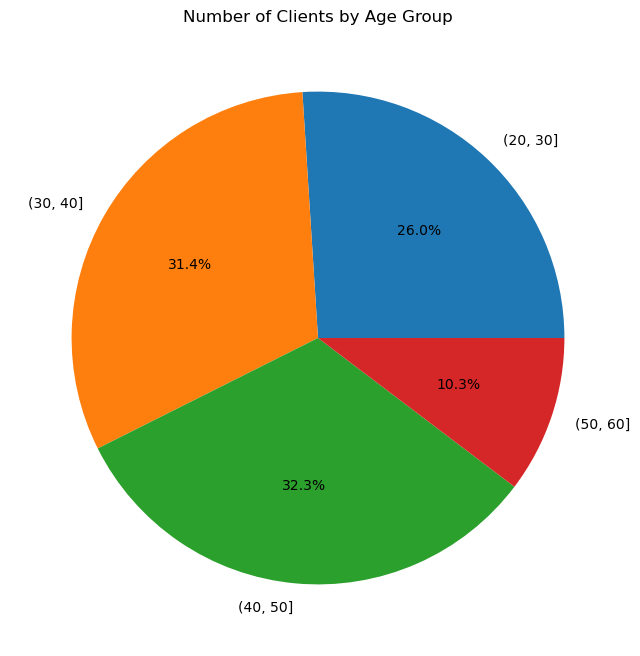

In [24]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# Create age bins
bins = np.arange(0, 101, 10)

# Assign each age to a bin
clients_complete['age_group'] = pd.cut(clients_complete['age'], bins)

# Count the number of clients in each age group
age_group_counts = clients_complete['age_group'].value_counts().sort_index()

# Filter out unnecessary categories
age_group_counts = age_group_counts[age_group_counts > 0]

# Plot the pie chart
age_group_counts.plot.pie(autopct='%1.1f%%', figsize=(8, 8))
plt.title('Number of Clients by Age Group')
plt.ylabel('')
plt.show()

> *Cette représentation n’apporte pas suffisamment d’information.* 
* Réalisez un histogramme avec un découpage des tranches d’âge deux fois plus fin (fonction `hist(...)`, option `bins`).

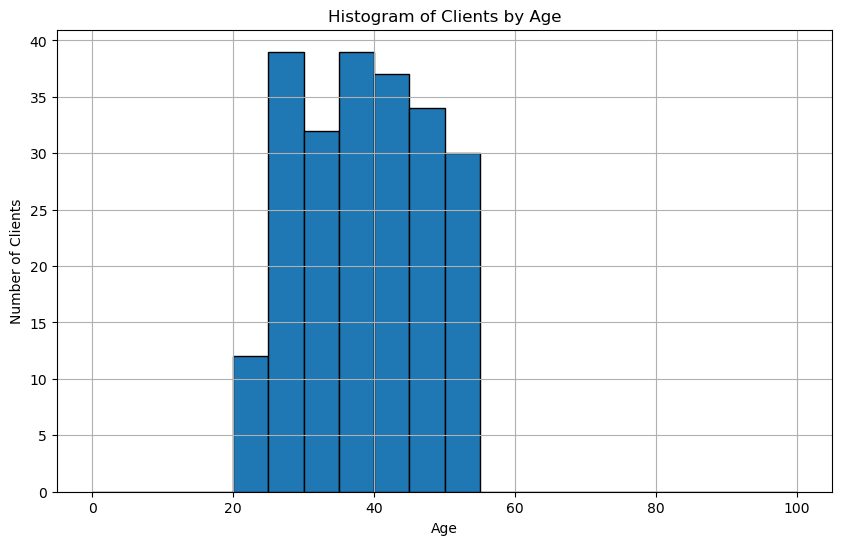

In [25]:
# Create finer age bins
finer_bins = np.arange(0, 101, 5)

# Plot the histogram
clients_complete['age'].hist(bins=finer_bins, edgecolor='black', figsize=(10, 6))
plt.title('Histogram of Clients by Age')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.show()

# Exercice 2 : Un premier nettoyage de données

## E2Q1. Créons le dataframe

Récupérez le fichier `data_mm02_person.csv` et importez-le dans un dataframe.

In [26]:
data_mm02_person = pd.read_csv('data_mm02_person.csv')
print(data_mm02_person.head())

   prenom                                   email date_naissance  \
0   Leila                       leila@example.com     23/01/1990   
1  Samuel                  samuel_329@example.com     20/09/2001   
2   Radia                choupipoune@supermail.eu  12 Sept. 1984   
3    Marc  marco23@example.com, mc23@supermail.eu     10/02/1978   
4    Heri                 helloworld@supermail.eu     05/03/2008   

            pays taille  
0         France  1.49m  
1            NaN  1.67m  
2  Côte d'ivoire  153cm  
3         France  1.65m  
4     Madagascar  1.34m  


## E2Q2. Regardons de plus près les valeurs nulles

* Déterminez le nombre de valeurs nulles par catégorie, en combinant les méthodes `isnull()` et `sum()`.
> *Veillez à n’afficher que les catégories pour lesquelles il existe des valeurs nulles.*
* Affichez toutes les lignes contenant au moins une valeur nulle, grâce à la méthode `any(...)` et son option `axis`.

In [27]:
# Determine the number of null values per category
null_values_per_category = data_mm02_person.isnull().sum()
null_values_per_category = null_values_per_category[null_values_per_category > 0]
print(null_values_per_category)

# Display all rows containing at least one null value
rows_with_null_values = data_mm02_person[data_mm02_person.isnull().any(axis=1)]
print(rows_with_null_values)

date_naissance    1
pays              1
dtype: int64
   prenom                   email date_naissance   pays taille
1  Samuel  samuel_329@example.com     20/09/2001    NaN  1.67m
6  samuël  samuel_329@example.com            NaN  Bénin  1.45m


## E2Q3. Les erreurs lexicales : commençons par regarder les pays.

* Établissez une liste sans doublon des pays représentés, via la méthode `unique()`.
* Une valeur n’est clairement pas un nom de pays. Affectez la valeur `np.NaN` à toutes les lignes dont le champ `pays` n’est pas correct. La méthode `isin(...)` pourra vous servir.

In [38]:
import numpy as np

# Establish a list of unique countries
unique_countries = data_mm02_person['pays'].unique()
print(unique_countries)

# Filter unique countries to exclude null, numbers, and empty strings
unique_countries = unique_countries[~pd.isnull(unique_countries)]
unique_countries = unique_countries.astype(str)
unique_countries = unique_countries[~np.char.isdigit(unique_countries)]
unique_countries = unique_countries[unique_countries != '']
print(unique_countries)

# Remplace pays who's not in unique_countries by np.nan use isin
data_mm02_person['pays'] = data_mm02_person['pays'].where(data_mm02_person['pays'].isin(unique_countries))
print(data_mm02_person['pays'])


['France' nan "Côte d'ivoire" 'Madagascar' 'Bénin']
['France' "Côte d'ivoire" 'Madagascar' 'Bénin']
0           France
1              NaN
2    Côte d'ivoire
3           France
4       Madagascar
5              NaN
6            Bénin
Name: pays, dtype: object


## E2Q4. Intéressons-nous aux tailles et aux erreurs d’irrégularité.

* Affichez les données qui ne sont pas exprimées en mètre (par indexation booléenne, grâce à méthode `contains(...)` en cherchant les unités).
* Corrigez manuellement cette erreur (puisqu’elle est peu répandue) pour obtenir une colonne homogène et exploitable.
* Créez une nouvelle colonne `taille_cm` entière contenant les tailles en centimètres (et uniquement les valeurs numériques, pas d’unité, via la méthode `replace(...)`).
> Notez que la méthode `astype(...)` est utile pour typer correctement une nouvelle colonne.
* Supprimez la colonne taille dont le format ne permet pas son exploitation, grâce à la méthode `drop(...)`.
* Pour plus d’aisance, renommez la colonne `taille_cm` en `taille` via la méthode `rename(...)`.
* On peut traiter les colonnes de manière plus automatique. Voici les poids correspondants aux personnes. Ajoutez une colonne `poids` contenant ces données à votre dataframe.

               poids = ["65000g", "88400g", "68000g", "75200g", "00Kg", "70200g", "70200g"]

In [39]:
# Display data not expressed in meters
non_meter_data = data_mm02_person[data_mm02_person['taille'].str.contains('cm')]
print(non_meter_data)

# Manually correct the error
data_mm02_person.loc[data_mm02_person['taille'].str.contains('cm'), 'taille'] = '1.53m'

# Create a new column 'taille_cm' containing heights in centimeters
data_mm02_person['taille_cm'] = data_mm02_person['taille'].str.replace('m', '').astype(float) * 100
data_mm02_person['taille_cm'] = data_mm02_person['taille_cm'].astype(int)

# Drop the original 'taille' column
data_mm02_person = data_mm02_person.drop(columns=['taille'])

# Rename the 'taille_cm' column to 'taille'
data_mm02_person = data_mm02_person.rename(columns={'taille_cm': 'taille'})

# Add a column 'poids' containing the provided weights
poids = ["65000g", "88400g", "68000g", "75200g", "00Kg", "70200g", "70200g"]
data_mm02_person['poids'] = poids

print(data_mm02_person)

  prenom                     email date_naissance           pays taille
2  Radia  choupipoune@supermail.eu  12 Sept. 1984  Côte d'ivoire  153cm
   prenom                                   email date_naissance  \
0   Leila                       leila@example.com     23/01/1990   
1  Samuel                  samuel_329@example.com     20/09/2001   
2   Radia                choupipoune@supermail.eu  12 Sept. 1984   
3    Marc  marco23@example.com, mc23@supermail.eu     10/02/1978   
4    Heri                 helloworld@supermail.eu     05/03/2008   
5   Hanna                  hanna2019@supermail.eu     01/01/1970   
6  samuël                  samuel_329@example.com            NaN   

            pays  taille   poids  
0         France     149  65000g  
1            NaN     167  88400g  
2  Côte d'ivoire     153  68000g  
3         France     165  75200g  
4     Madagascar     134    00Kg  
5            NaN     345  70200g  
6          Bénin     145  70200g  


* Supprimez le dernier caractère dans cette colonne (pour normalement obtenir uniquement des chiffres). On fermera volontairement les yeux sur les éventuelles erreurs dans cette liste. Convertissez ensuite la colonne poids en valeurs numériques grâce à la méthode `pd.to_numeric(...)` tout en forçant les erreurs de conversion à des valeurs manquantes (`np.NaN)`, via l’option `errors`.
* Remplacez les éventuelles valeurs manquantes de la colonne `poids` par la moyenne des valeurs existantes. 

In [40]:
# Remove the last character in the 'poids' column
data_mm02_person['poids'] = data_mm02_person['poids'].str[:-1]

# Convert the 'poids' column to numeric values, forcing errors to NaN
data_mm02_person['poids'] = pd.to_numeric(data_mm02_person['poids'], errors='coerce')

# Replace missing values in the 'poids' column with the mean of the existing values
mean_poids = data_mm02_person['poids'].mean()
data_mm02_person['poids'].fillna(mean_poids, inplace=True)

print(data_mm02_person)

   prenom                                   email date_naissance  \
0   Leila                       leila@example.com     23/01/1990   
1  Samuel                  samuel_329@example.com     20/09/2001   
2   Radia                choupipoune@supermail.eu  12 Sept. 1984   
3    Marc  marco23@example.com, mc23@supermail.eu     10/02/1978   
4    Heri                 helloworld@supermail.eu     05/03/2008   
5   Hanna                  hanna2019@supermail.eu     01/01/1970   
6  samuël                  samuel_329@example.com            NaN   

            pays  taille         poids  
0         France     149  65000.000000  
1            NaN     167  88400.000000  
2  Côte d'ivoire     153  68000.000000  
3         France     165  75200.000000  
4     Madagascar     134  72833.333333  
5            NaN     345  70200.000000  
6          Bénin     145  70200.000000  


## E2Q5. Intéressons-nous maintenant aux courriels et aux erreurs de formattage.

* Certaines lignes contiennent plusieurs valeurs au lieu d’une. Générez une série déterminant le nombre de caractère `@` dans chaque valeur de la colonne `email`, via la méthode `count()`. Affichez les données où plusieurs courriels sont fournis.
* Conservez uniquement la dernière valeur. Veillez à ne pas faire un code ad-hoc et ne pas corriger manuellement la ligne.
* On peut également constater que toutes les dates ne respectent pas le même format. Il convient de régler la question. Il faut procéder en deux fois :
    * Créez une nouvelle colonne `naiss` en faisant une conversion selon un premier format (`%d/%m/%Y` par exemple) grâce à la méthode `pd.to_datetime(...)`, en spécifiant ce format et en écartant les échecs (comme pour les poids) par l’option `errors` ;
    * Refaites une conversion selon un autre format (`%d %b. %Y` en l’occurrence) pour les valeurs nulles de cette nouvelle colonne.
* Terminez proprement en remplaçant l’ancienne colonne par la nouvelle, contenant les mêmes dates mais qui respectent un même format et sont donc exploitables.

In [44]:
# Generate a series determining the number of '@' characters in each email
email_at_counts = data_mm02_person['email'].str.count('@')

# Display data where multiple emails are provided
multiple_emails = data_mm02_person[email_at_counts > 1]
print(multiple_emails)

# Keep only the last email in the 'email' column
data_mm02_person['email'] = data_mm02_person['email'].apply(lambda x: x.split(',')[-1].strip())

# Create a new column 'naiss' with conversion according to the first format
data_mm02_person['naiss'] = pd.to_datetime(data_mm02_person['date_naissance'], format='%d/%m/%Y', errors='coerce')

# Convert according to another format for null values in 'naiss'
data_mm02_person.loc[data_mm02_person['naiss'].isnull(), 'naiss'] = pd.to_datetime(
  data_mm02_person.loc[data_mm02_person['naiss'].isnull(), 'date_naissance'], 
  format='%d %b. %Y', 
  errors='coerce'
)

# Replace the old 'date_naissance' column with the new 'naiss' column
data_mm02_person['date_naissance'] = data_mm02_person['naiss']
data_mm02_person = data_mm02_person.drop(columns=['naiss'])

print(data_mm02_person)

Empty DataFrame
Columns: [prenom, email, date_naissance, pays, taille, poids]
Index: []
   prenom                     email date_naissance           pays  taille  \
0   Leila         leila@example.com     1990-01-23         France     149   
1  Samuel    samuel_329@example.com     2001-09-20            NaN     167   
2   Radia  choupipoune@supermail.eu            NaT  Côte d'ivoire     153   
3    Marc         mc23@supermail.eu     1978-02-10         France     165   
4    Heri   helloworld@supermail.eu     2008-03-05     Madagascar     134   
5   Hanna    hanna2019@supermail.eu     1970-01-01            NaN     345   
6  samuël    samuel_329@example.com            NaT          Bénin     145   

          poids  
0  65000.000000  
1  88400.000000  
2  68000.000000  
3  75200.000000  
4  72833.333333  
5  70200.000000  
6  70200.000000  


## E2Q6. Intéressons-nous enfin au cas des doublons.

* Affichez les lignes en doublons, d’après leur courriel, grâce à la méthode `duplicated(...)`.
* Vous pouvez constater que chacune des lignes apportent son lot d’information. Il faut consolider tout ça au cas par cas en complétant la première occurence avec les informations supplémentaires fournies par les autres occurences. En cas de valeurs incohérentes, on affectera la moyenne des valeurs existantes.
* Supprimez les doublons en conservant la première occurence, qui contient désormais les données aggrégées, via la méthode `drop_duplicates(...)`.

In [47]:
# Display duplicate rows based on their email
duplicate_rows = data_mm02_person[data_mm02_person.duplicated(subset='email', keep=False)]
print(duplicate_rows)

# Consolidate duplicate rows by filling missing values in the first occurrence
for index, row in duplicate_rows.iterrows():
  first_occurrence = data_mm02_person.loc[data_mm02_person['email'] == row['email']].iloc[0]
  for column in data_mm02_person.columns:
    if pd.isnull(first_occurrence[column]) and not pd.isnull(row[column]):
      data_mm02_person.at[first_occurrence.name, column] = row[column]
    elif column in ['taille', 'poids'] and first_occurrence[column] != row[column]:
      data_mm02_person.at[first_occurrence.name, column] = data_mm02_person[[column]].mean()

# Remove duplicate rows, keeping the first occurrence
data_mm02_person = data_mm02_person.drop_duplicates(subset='email', keep='first')

print(data_mm02_person)

Empty DataFrame
Columns: [prenom, email, date_naissance, pays, taille, poids]
Index: []
   prenom                     email date_naissance           pays  taille  \
0   Leila         leila@example.com     1990-01-23         France     149   
1  Samuel    samuel_329@example.com     2001-09-20            NaN     167   
2   Radia  choupipoune@supermail.eu            NaT  Côte d'ivoire     153   
3    Marc         mc23@supermail.eu     1978-02-10         France     165   
4    Heri   helloworld@supermail.eu     2008-03-05     Madagascar     134   
5   Hanna    hanna2019@supermail.eu     1970-01-01            NaN     345   

          poids  
0  65000.000000  
1  88400.000000  
2  68000.000000  
3  75200.000000  
4  72833.333333  
5  70200.000000  
